***Question:*** How does simple function like ReLu create non-linearity?

***Answer:***
- Imagine we have a dataset and a Simple Neural Network setup.
- The layer uses activation function $ReLu(Ƶ) = max(0,Ƶ), where \ Ƶ \to w^Tx+b$.
- Here $w \to weight \ matrix $ and $b \to bias$.
- The ReLu output becomes and input to next neurons and there is a weight associated with it.
- In the example below we piece wise linear function that represents application of ReLu. $1.5*max(0,2*x+1) + 1*max(0,x+2) + 1*max(0.x+5)$
  <img src='https://drive.google.com/uc?id=18DzmTpKAOZYoLRThL-2AOpiCOhAd5UtK'>
- So we get non linearity because of bunch of piece wise linear function.
- In this example we are simulating 3 ReLu functions. If there were $100's \ or \ 1000's$ of such ReLu functions, then we can create an extremely complex decision surface.

#### Binary-Class Setup:

- Imagine we have Binary Classification where output is either 0 or 1 i.e. $y_i \in \{0,1 \}$.
- $Z_i$ is represented as $w^Tx_i+b$. This is passed to Sigmoid activation function.
  <img src='https://drive.google.com/uc?id=1xdn_vzjntn-J_4qOMhE14r3NFEASTcKz'>
- Sigmoid function is represented as $Sigmoid(Ƶ) = P(y_i=1 \bigg| x_i,w,b)$ that gives probabilities $(P_i)$.
$$Sigmoid(Ƶ) = \frac{1}{1+e^{-Ƶ_i}} = \frac{e^{Ƶ_i}}{1+e^{Ƶ_i}}$$
- When we have binary classification, we use sigmoid and its shape is given by above equation.

*Note:*  $P(y_i=0\bigg|x_i,w,b) = 1-P_i$

- In Binary case, we also use log-loss.
- Log-loss is also referred to as Binary Cross Entropy (CE).
  <img src='https://drive.google.com/uc?id=1TmQ9JnJ1jEy2SD5jQF6D8ZlcYglFp0Lf'>
- It looks like: $-\bigg[  \ y_i log(\hat{y_i}) + (1-y_i) log(1-\hat{y_i})\bigg]$
- In binary-case, Sigmoid converts $Ƶ_i$ into probabilities.

#### Multi-Class Setup:

- We can extend the concept of log-loss in Binary Class to Multi-class setup as well.
  <img src='https://drive.google.com/uc?id=1OT2zBpIfUc5zJekp3cOj-Gh7SjKwivX9'>
- Imagine, we have inputs $x_i$ with 3 set of classes as output. We have a bunch of layers $(L_1,L_2,..)$ in between and 3 neuron in the output that computes $(Ƶ_1, Ƶ_2, Ƶ_3)$.  
- We want to convert $(Ƶ_i)$ to probabilities such that:
\begin{equation}
\begin{aligned}
  P_1 &= P(y_i=1 |x_i, \theta ) \\
  P_2 &= P(y_i=2 |x_i, \theta ) \\
  P_3 &= P(y_i=3 |x_i, \theta )  
   \ where \ \theta \to \ all \ parameters \ of \ Neural \ Network.
\end{aligned}
\end{equation}

*Note:*
- $P_1, P_2, P_3$ have an important property. $0\le P_i \le 1 \ and \ \sum_{i=1}^{3} P_i = 1$
- Probabilities are mutually exclusive and exhaustive.

#### Softmax:

- Similar to Sigmoid, there is a Softmax funtion people have come-up with. It outputs:
$$ P_1 = \frac{e^{Ƶ_1}}{\sum_{i=1}^{k} e^{Ƶ_i}}, \ \ P_2 = \frac{e^{Ƶ_2}}{\sum_{i=1}^{k} e^{Ƶ_i}}, \ \ P_1 = \frac{e^{Ƶ_3}}{\sum_{i=3}^{k} e^{Ƶ_i}}$$
- if $k=3$, then $P_1+P_2+P_3 = 1$.
  <img src='https://drive.google.com/uc?id=1d_p2ukqsJ8yST3J2PeKYLXI8ksBm7cU8'>
- This is very popular for multi-class classification. Softmax can be thought of as Sigmoid like function for multi-class setup.
- In Binary setup, we have Sigmoid and log-loss. Similarly, we have Softmax and CE in multi-class setup.

***Question:*** Why couldn't we simply use $Ƶ_i$ and normalize it using sum of $Ƶ_i$?

***Answer:***
- We could it. But using exponents has certain advantages.
  <img src='https://drive.google.com/uc?id=1eddKrE6smrFzO__vgKytTITD_1u7f5Ra'>
- If we took $P_i$ as $\frac{Ƶ_i}{\sumƵ_i}$ where $-\infty \le Ƶ_i \le \infty$. So $P_i$ can be -ve. In the above example if we had used $P_i = \frac{Ƶ_i}{\sumƵ_i}$, then the output would have been $1:3:6$.
- When we use $P_i = \frac{e^{Ƶ_i}}{\sum e^{Ƶ_i}}$, then it would have been $4.5*10^{-5}, 0.00247, 0.997$. So whichever has maximum value, gets assigned highest probability because of exponents.


***Question:*** Why we use only the exponential function & not any other?

***Answer:***
- Exponents are easily differentiable: $\frac{\partial e^Ƶ}{\partial Ƶ} = e^Ƶ$.
- That's why exponents are so common in DL.
  <img src='https://drive.google.com/uc?id=1_GLrJz45llF6xdIf6TzNeHS68H77Irec'>

***Question:*** Previously we all dealt with one neuron at end. Why can't we have a setup where single neuron predicts class which it belongs to?

***Answer:***
- Actually, we don't want it to return an integer.
  <img src='https://drive.google.com/uc?id=1DQ5gdvKKo74zw-IndRbFPjeiJo36WzOS'>
- Imagine, we have $x_i$ that belongs to class $3$ and $k=3$.
- What we want is probability distribution of this point $x_i$ belonging to these classes.
- If we get integer values, then designing loss function is difficult.
- In the below example, model barely classifies this point as belonging to class $2$. But difference in probability of class $2$ and class $3$ is very small.
- Having probabilistic class labels helps to make such decisions.
  <img src='https://drive.google.com/uc?id=1-d6RitucylNBmeRAg710pySUp-Pd10w2'>

#### Loss function in Multi-class setup:

- Similar to log-loss function in Binary classification, we can simply extend it to Multi-class setup.
- This simple extension using concept of Cross Entropy.
  <img src='https://drive.google.com/uc?id=1HohfhyUGaXbOIGqQ-msRts9iUW2VhV4r'>

#### Formula:

- Suppose we have point $x_i,y_i$, where $x_i$ could belong to either of $1,2,.j,..k$ class.
- We have probabilities $P_{i1},P_{i2},.P_{ij},..P_{ik} \forall_{j} = 1\to k$
  <img src='https://drive.google.com/uc?id=1zhPMIEQEESfhybzhzZc9aAZr-G5NBpBD'>
- $y_i$ are represented a one-hot-encoding. So if $y_i \to class \ 2$ then, it is represented as $(0,1,0,0,..0)$ vector.
- Cross Entropy is represented as:
$$CE_i = - \sum_{j=1}^{k} y_{ij} \ log(P_{ij})$$


- This looks like log-loss.
- Imagine $k=2$ then $CE_i = - [y_{i1} log(P_{i1}) + y_{i2} log(P_{i2})]$.
  <img src='https://drive.google.com/uc?id=1UGI2B2mu1C4RLVdP2gwueeTFbT_OuaSY'>
- If $y_i \in class \ 1$, then $y_{i2} = 0$ and $y_{i1} = 1$. $P_{i2}$ can also be represented as $P_{i2} = (1-P_{i1})$.
- This is nothing but log-loss. Hence, log-loss is often referred to as Binary Cross Entropy.

- In Binary classification, Sigmoid is used and in K-ary Softmax is used to determine probabilities.
  <img src='https://drive.google.com/uc?id=1e3ehdpcsHXX-3Yd9zXTLHmpM-Bgxlv9c'>
- In Binary classification, Binary cross entropy/log-loss is used and in k-ary Cross entropy is used as loss function.

***Question:*** Could you provide some examples of multi-classification using three neurons?

***Answer:***
- Let $x_i$ has 2 features and we have simple Neural network for 3 class classifier.
- $L_1$ has 100 units of ReLU. Output of these ReLu functions is passed to simple linear functions (for simplicity).
- These linear functions produces output $Ƶ_{i1}, Ƶ_{i2}, Ƶ_{i3}$ and is passed to Softmax.
- Softmax produces probabilities $P_{i1}, P_{i2}, P_{i3}$. Using these 3 proabilities, we compute loss using cross entropy function $L_{CE}(y^{OHE}_i, P_{ij})$.
  <img src='https://drive.google.com/uc?id=1loxvoCN9WG7UIMlfn-A24HV5xfiK03SL'>
- In this example, Softmax, Linear Activation function, ReLu and matrix multiplication $(w^Tx_i+b)$ are differentiable.
- When we get a query point $x_q \in \mathbb{R}^2$, $x_q$ is passed through network and probabilities are generated.
- If $P_{q3}$ is high, then we say that $q_p$ belongs to class 3.

***Question:*** Why don't we pass the softmax as the activation function itself instead of a ReLu function?

***Answer:***
- Softmax has multiple inputs and multiple outputs. But an activation function gets input as $w^Tx+b$ and its output is passed to further layers.
- Activation functions take scaler as inputs and gives scaler as output whereas Softmax takes vector as input and gives vector as output.
  <img src='https://drive.google.com/uc?id=1ywh1GIUf_gR5620_M4PL40m-_blz5CCd'>

#### Python Code: Simple Neural Network with Back propogation

In [ ]:
#!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

In [1]:
!ls -lrt dataset/*

-rw-r--r--  1 debnsuma  staff  12867 May  5 10:26 dataset/spiral.csv


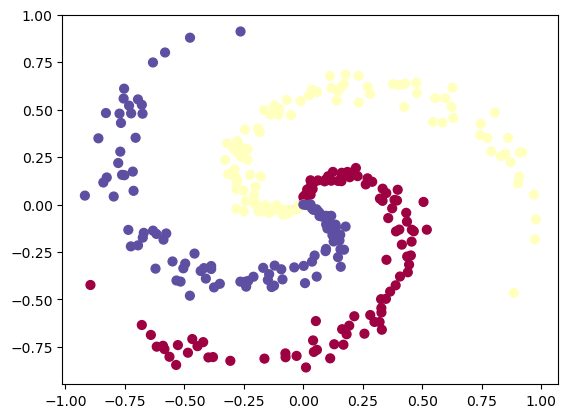

In [105]:
# Very simple case of a back-prop
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = 'dataset/spiral.csv' 

df = pd.read_csv(dataset)
plt.scatter(df["x1"], df["x2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()

In [106]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [107]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [108]:
class NN:

    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1,self.h))
        self.W2 = 0.01 * np.random.randn(self.h,self.n)
        self.b2 = np.zeros((1,self.n))

    def fwd_prop(self, X):
        # Layer 1 
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        # Layer 2
        Z2 = np.dot(A1, self.W2) + self.b2
        Z2 = np.exp(Z2)
        A2 = Z2 / np.sum(Z2, axis=1, keepdims=True)
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples),y])
        loss = np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        # compute the gradient on scores
        num_examples = y.shape[0]
        dZ2 = A2
        dZ2[range(num_examples),y] -= 1

        dZ2 /= num_examples
        # first backprop into parameters W2 and b2
        dW2 = np.dot(A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        # next backprop into hidden layer, A1
        dA1 = np.dot(dZ2, self.W2.T)
        # backprop the ReLU non-linearity
        dA1[A1 <= 0] = 0
        # finally into W,b
        dZ1 = dA1
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, y, lr, reg, max_iters):
        num_examples = X.shape[0]               # 300 data points (X.shape : (300,2))
        for i in range(max_iters):
            #foward prop
            A1, A2 = self.fwd_prop(X)           # Returns the output of L1 (Hidden Layer) and L2 (Output Layer), Shape pf A1 (dim_iniput x n_hidden), Shape pf A2 (n_hidden x dim_output) 
            # calculate loss
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)  # Adding L2 Regulatization for both W1 and W2 
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))

            dW1, db1, dW2, db2  = self.back_prop(X, A1, A2, y)

            # add regularization gradient contribution
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # perform a parameter update
            self.W1 += -lr * dW1
            self.b1 += -lr * db1
            self.W2 += -lr * dW2
            self.b2 += -lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1)
        Z2 = np.dot(A1, self.W2) + self.b2
        y_hat = np.argmax(Z2, axis=1)
        return y_hat

In [109]:
nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, y, lr=1, reg=1e-3, max_iters=10000)
print('training accuracy: %.2f' % (np.mean(nn_model.predict(X) == y)))

iteration 0: loss 1.098823
iteration 1000: loss 0.309652
iteration 2000: loss 0.256148
iteration 3000: loss 0.250615
iteration 4000: loss 0.249126
iteration 5000: loss 0.248048
iteration 6000: loss 0.247306
iteration 7000: loss 0.247109
iteration 8000: loss 0.247025
iteration 9000: loss 0.246989
training accuracy: 0.99


# Understanding of computing the loss 

In [124]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [125]:
X[:10]

array([[ 0.00000000e+00,  0.00000000e+00],
       [-6.50123964e-04,  1.00800667e-02],
       [ 9.80910862e-03,  1.76607760e-02],
       [ 7.48711824e-03,  2.93635268e-02],
       [-2.71404625e-05,  4.04040313e-02],
       [ 7.41008855e-03,  4.99584899e-02],
       [ 3.04241080e-02,  5.24162974e-02],
       [ 2.47420249e-02,  6.62368632e-02],
       [ 1.60027032e-02,  7.92076979e-02],
       [ 3.90523417e-02,  8.20937112e-02]])

In [126]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([100, 100, 100]))

In [132]:
_dZ2 = np.array([
 [0.2, 0.5, 0.3],   # Probabilities for Example 1
 [0.1, 0.6, 0.3],   # Probabilities for Example 2
 [0.3, 0.4, 0.3],   # Probabilities for Example 3
 [0.8, 0.1, 0.1]    # Probabilities for Example 4
])

_y = [1, 0, 2, 0]

In [133]:
_dZ2

array([[0.2, 0.5, 0.3],
       [0.1, 0.6, 0.3],
       [0.3, 0.4, 0.3],
       [0.8, 0.1, 0.1]])

In [134]:
_dZ2[range(4), _y]

array([0.5, 0.1, 0.3, 0.8])

In [135]:
_y

[1, 0, 2, 0]

In [136]:
_dZ2[range(4), [1, 0, 2, 0]] -= 1

In [137]:
_dZ2

array([[ 0.2, -0.5,  0.3],
       [-0.9,  0.6,  0.3],
       [ 0.3,  0.4, -0.7],
       [-0.2,  0.1,  0.1]])

In [120]:
nn_model.b1.shape, nn_model.b2.shape

((1, 100), (1, 3))

In [121]:
nn_model.W1.shape, nn_model.W2.shape

((2, 100), (100, 3))

In [122]:
X.shape

(300, 2)

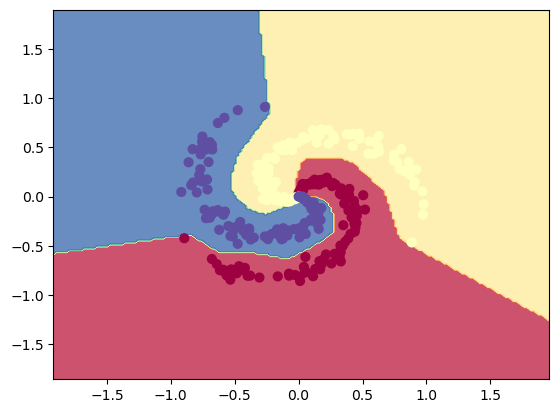

In [123]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

##### Neural Network Architecture:

- In this example we have input with 2 features $(d=2)$ which is passed to hidden layers with 100 units $(h=100)$.
- Output from these hidden layers is connected to softmax layers with 3 outputs $(n=3)$.
- Weight matrix $W_1$ has dimension $d*h$, bias $b_1$ has dimension $1*h$.
- Weight matrix $W_2$ has dimension $h*n$, bias $b_2$ has dimension $1*n$.
  <img src='https://drive.google.com/uc?id=1GNq7xFbRHiT5uJnxHCYcK9Mox8W_pqly'>

##### Forward Propogation:

- $Z1$ is computed as $Z1 = X^TW_1+b_1$.
- $A1$ represented ReLu function.
- $Z2$ is computed as $Z2 = A1^TW_2+b_2$. We further take exponent of $Z2$ and compute Softmax.
- Output of this Softmax is $A_2$.
  <img src='https://drive.google.com/uc?id=1gkPxDh1J32xbVF-gPERSOVxAMO1nHi2F'>


##### Loss Function:

- Cross Entropy is computed as:
$$CE = \frac{1}{m} \sum_{i=1}^m CE_i  \ \ where \ CE_i = - \sum_{j=1}^{k} y_{ij} \ log(P_{ij})$$
- If $y_i \in$ Class 2, then $y_{i2} = 1$ and $y_{ij\neq2} = 0$.
  <img src='https://drive.google.com/uc?id=1C8Rr6qbLHrBbQvrFvbOUtNVL2JDvSMc9'>


##### Summary of Code so far:

- $X$ is the input using which a weighted sum $Z_1$ is computed using $w_1,b_1$.
- $Z_1$ is passed through ReLu unit to compute output $A_1$.
- Using $A_1$ and $w_1,b_1$ a weighted sum is computed $Z_2$.
- Softmax is applied to $Z_2$ and $A_2$ is computed which is passed to Cross Entropy.
  <img src='https://drive.google.com/uc?id=15x2A4UxJEYDfe1p3Cd41W4bV5UHQhyHv'>




##### Back Propogation:

- Softmax layer generates probabilities $P_1, P_2, P_3$.
- These probabilites along with one-hot encoding outputs $Y^1_{OHE},Y^2_{OHE},Y^3_{OHE}$ are passed to loss function $L_{CE}$.
  <img src='https://drive.google.com/uc?id=1cVFRhFbfrQZFhkp4MXXxRRsUlfVUufql'>




- Softmax layer generates probabilities $P_1, P_2, P_3$.
- These probabilites along with one-hot encoding outputs $Y^1_{OHE},Y^2_{OHE},Y^3_{OHE}$ are passed to loss function $L_{CE}$.
- While computing derivative of loss function $L_{CE}$, we need to calculate partial derivatives for $\frac{\partial L_{CE}}{\partial Ƶ_1}, \frac{\partial L_{CE}}{\partial Ƶ_2} \ and \ \frac{\partial L_{CE}}{\partial Ƶ_3}$.
  <img src='https://drive.google.com/uc?id=1cVFRhFbfrQZFhkp4MXXxRRsUlfVUufql'>




- Derivative of cross entropy loss function wrt $Ƶ_j$ is represented as:
$$\frac{\partial L_{CE}}{\partial Ƶ_{j}} = P_j - Y^{OHE}_j$$
where $P_j$ is probability that $x_i \in class \ j$.
  <img src='https://drive.google.com/uc?id=1VeTTQuBzUGYh5-zSoESX2dSeK9gF_6Ea'>


*Note:* There is a detailed explanation of above representation:


https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1



- $\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial W_2}$
- $\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_2} * \frac{\partial Z_2}{\partial A_1}$
- $\frac{\partial Z_2}{\partial W_2} = A_1$
- $\frac{\partial L}{\partial Z_2} = P_j - y_j$
- $\frac{\partial Z_2}{\partial A_1} = W_2$
  <img src='https://drive.google.com/uc?id=1ZB5oYsrBsZZReVsSONiImdvWrhsZDYqr'>
- Using the above partial derivatives, back propogation is computed.



##### Fit Function:

- In fit function, we iterate over the input $max\_iters$ times.
- Using forward propogation, $A_1$ and $A_2$ are computed.
- Croos entropy loss is computed which is regularized further using $L_2$ regularization technique.
- After every 1000 iterations, loss is printed.
- Partial derivatives are computed using back propogation on entire dataset.
  <img src='https://drive.google.com/uc?id=1nIhVFbzcIvXdO8vJij6GzX7vI9utK7jQ'>
  


- Using these partial derivatives, weights and biases are updated.
  <img src='https://drive.google.com/uc?id=1R-zn3--bQ2BVm9FQZ59qkJin0TqfvYCj'>



##### Predict Function:

- Whenever we have a query point $x_q$, the output is computed as:
\begin{equation}
\begin{aligned}
  A_1 &= \max(0, W_1^Tx_q + B_1) \\
  Z_2 &= W_2^TA_1 + B_2 \\  
  \hat{y} &= Argmax(Z_2)
\end{aligned}
\end{equation}

  <img src='https://drive.google.com/uc?id=1RGV9bU-LCgdOUOI3yFB0VW9uaXvCYFpF'>


- Output of predict function is training accuracy.
- After first 1000 iterations, there is a significant drop in the loss.
- But after 3000 iterations it plateaus.
  <img src='https://drive.google.com/uc?id=1EAOLF7qe7MySFUhxH0zFG_2h2sxIJHRn'>


##### Plot output graph:

- For this simple dataset, we see clear separation boundaries.
  <img src='https://drive.google.com/uc?id=1mR6DuW0BnAcy4lbN-I1xc97nffi9v3Vn'>


#### Coding Tracks for Deep Learning:

- There are 2 popular programming tracks for Deep Learning.
- Tensorflow 2 that includes Keras and Py-Torch.
  <img src='https://drive.google.com/uc?id=1YlqXLIyIOvDJP1wTUYKAuNlbOllRn9vu'>


*Note:* During lectures, we will use Tensorflow 2.

#### TF 2 and Keras: Sequential API

In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


print(tf.__version__)

2.16.1


In [139]:
#Keras Sequential API
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

- Here, we have input $x_i \in \mathbb{R}^2$.
- In keras, we build a sequential fully connected dense network.
- In first dense layer, we have 100 units with ReLu as activation function.
- Second layer has 3 units an 'Softmax' function.
  <img src='https://drive.google.com/uc?id=1byzRbm-qJgHPoB07me6rPwOQlRpBZrMU'>

In [140]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

- First layer has 300 parameters ($2*100$ weights and $100$ biases).
- Second layer has 303 parameters ($300$ weights and $3$ biases).
  <img src='https://drive.google.com/uc?id=18VdYWt0icHclgwtQcXDqfms4gO5Vc3Az'>


In [141]:
model.compile(optimizer=keras.optimizers.Adam(), # suggest in colab : Option+Esc in Mac
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

*Note:*
- We will study Adam Optimizer in future lectures.
- BinaryAccuracy just computes how many classification were correct (True) and how many were incorrect (False).


In [142]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [143]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


We need to One-hot encode $y_i$

In [144]:
from tensorflow.keras.utils import to_categorical
y_OHE = to_categorical(y)
print(y_OHE)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

- If we have 300 datapoints, then in Gradient Descent, we pass all these points to compute loss.  
  <img src='https://drive.google.com/uc?id=1a3u0i15sF1jZz3-Goez_pmiuNrUIV9Hc'>
- So partial derivative of Loss wrt $w_j$ is computed on all points.
  <img src='https://drive.google.com/uc?id=1t-6oisCTieSn7zkjTP1AVLlaZHBEH-7q'>
- In mini-batch GD, we create batch-size = 32 i.e. out of 300 datapoints 32 points are sampled randomly.
- But in this approach there is a problem of missing out on some of the points not being sampled at all.

- To overcome this, dataset is broken into batch-size of 32 and each set is passed iteratively to the model.
- This is called as Epoch. In a single Epoch, the model sees the entire dataset.
  <img src='https://drive.google.com/uc?id=1PdCTcQgmm0cQk7l9Ndgzj4O4th6Gvr3n'>




In [148]:
tf.config.run_functions_eagerly(True)
history = model.fit(X, y_OHE, epochs=10, batch_size=256)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9821 - loss: 0.1146
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9829 - loss: 0.1123
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9825 - loss: 0.1128
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9829 - loss: 0.1131
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9825 - loss: 0.1125
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9821 - loss: 0.1144
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9829 - loss: 0.1124
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9825 - loss: 0.1119
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9821 - loss: 0.1148
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.9825 - loss: 0.1124


In [149]:
tf.config.run_functions_eagerly(False)
history = model.fit(X, y_OHE, epochs=100, batch_size=256)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9816 - loss: 0.1133  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9834 - loss: 0.1105
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9825 - loss: 0.1130
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9821 - loss: 0.1142
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9821 - loss: 0.1113
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9816 - loss: 0.1148
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9824 - loss: 0.1139
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9841 - loss: 0.1096
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9832 - loss: 0.1131
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9841 - loss: 0.1100
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9832 - loss: 0.1116
Epoch 

In [150]:
# tf.config.run_functions_eagerly(True)
# history = model.fit(X, y_OHE, epochs=1000, batch_size=256)

As number of iterations increases, loss keeps on increasing and we get a very good accuracy.